### Pre-Processing of GoodReads_100K
* If you want to process GoodReads_100K.csv: https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k/
* Run this code to make final_data.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into a Pandas DataFrame
data = pd.read_csv("AI Based Book Recommendation System/Dataset/GoodReads_100k.csv")
data.size

# Remove duplicates from df
data = data.drop_duplicates()

# Handle outliers (e.g., filter unrealistic ratings)
data = data[(data['rating'] >= 1) & (data['rating'] <= 10)]

# Remove columns that are not needed
data = data[['isbn','title','author','rating','reviews','img','desc','genre','pages']]

# Rename columns
data.rename(columns={'isbn':'ISBN','title':'Title','link':'Link','author':'Author','rating':'Rating','reviews':'No. of ratings','img':'Image','desc':'Desc','genre':'Genre','pages':'Pages'},inplace=True)

data.isnull().sum() # no. of null values
data = data.dropna(subset=['Genre'])
data = data.dropna(subset=['Desc'])
data = data.dropna(subset=['Image'])
data = data.dropna(subset=['ISBN'])
data = data.reset_index(drop=True)

# Filter out books with greater than 50 ratings
final_data = data[data['No. of ratings'] >= 50]
final_data = final_data.reset_index(drop=True)

# Save the cleaned dataset
final_data.to_csv('AI Based Book Recommendation System/Dataset/final_data.csv',index=False)

* Run this code to make `final_data_with_ratings.csv` file from `final_data.csv`

In [ ]:
import numpy as np

# Load the Goodreads dataset
final_data = pd.read_csv('AI Based Book Recommendation System/Dataset/final_data.csv')

# Simulate user-book ratings
# Assume 1000 users and assign random ratings between 1 and 5 to each book by users
num_users = 1000
num_ratings = len(final_data)

# Generate random user IDs
user_ids = np.random.randint(1, num_users + 1, num_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, num_ratings)

# Add user IDs and ratings to the dataset
final_data['user_id'] = user_ids
final_data['rating'] = ratings

# Prepare the data for NCF
# Encode the user IDs and ISBNs
final_data['user_id'] = final_data['user_id'].astype(
    'category').cat.codes.values
final_data['ISBN'] = final_data['ISBN'].astype('category').cat.codes.values


# Save the final_data to a CSV file
final_data.to_csv("AI Based Book Recommendation System/Dataset/final_data_with_ratings.csv", index=False)

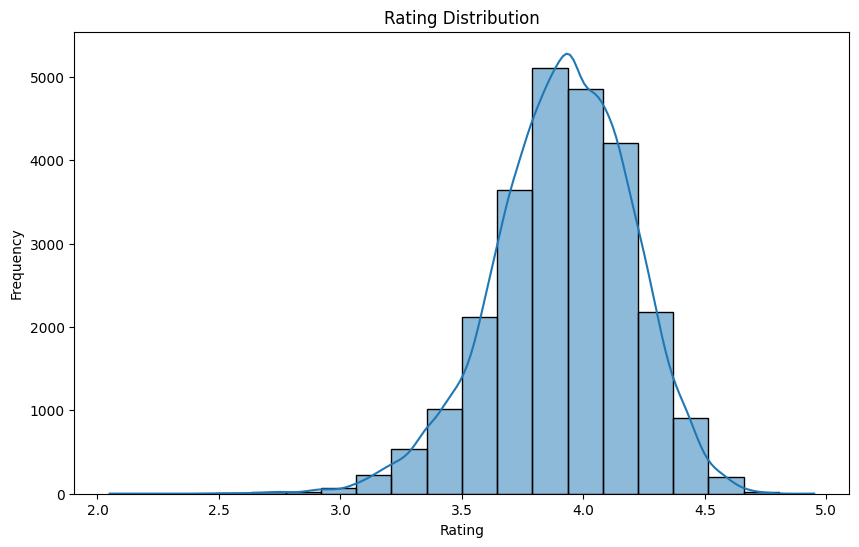

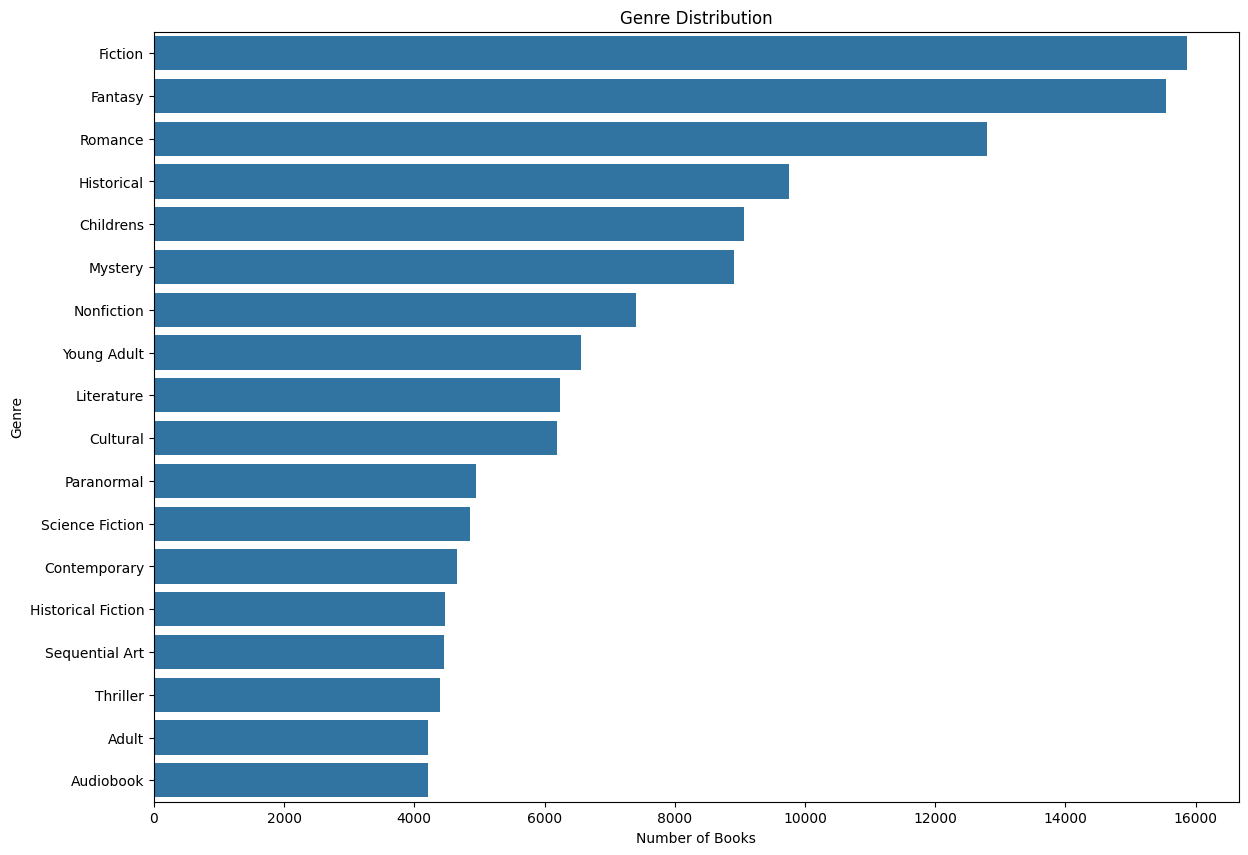

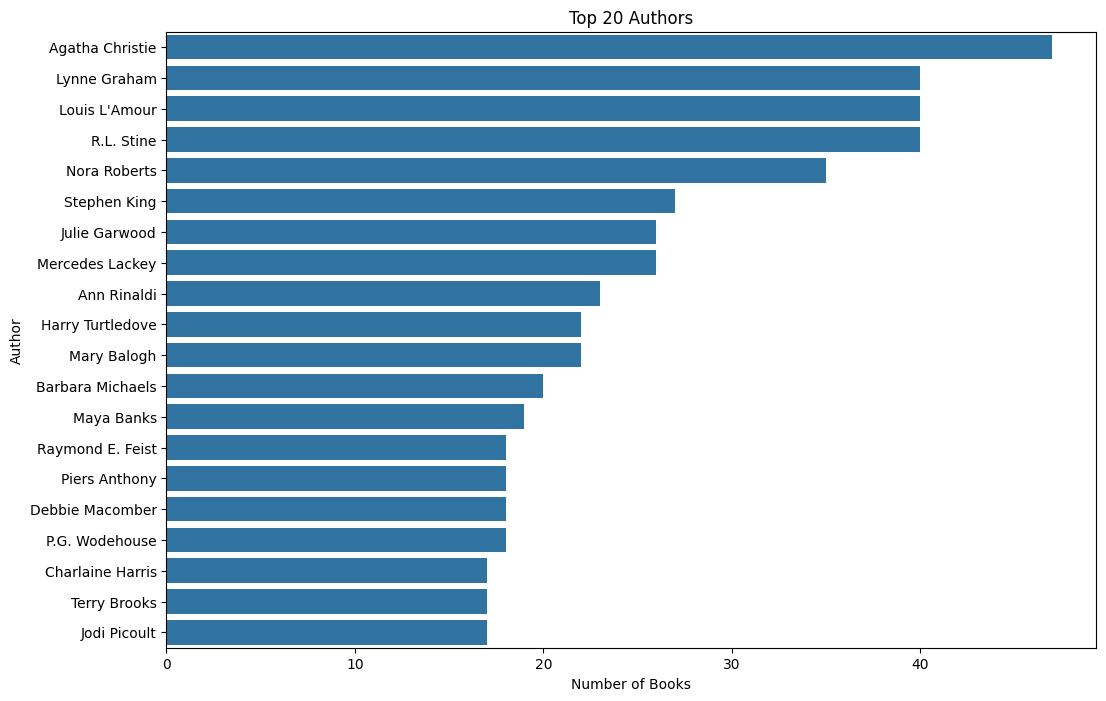

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
df = pd.read_csv('../Dataset/final_data.csv')

# Plot Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('../Images/rating_distribution.png')
plt.show()

# Plot Genre Distribution
# Extract and count distinct genres
genre_list = df['Genre'].dropna().str.split(',')
all_genres = [genre.strip() for sublist in genre_list for genre in sublist]

genre_counts = Counter(all_genres)

# Create a DataFrame for the genre counts
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_counts_df.columns = ['Genre', 'Count']
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Filter genres with more than 2000 books
filtered_genre_counts_df = genre_counts_df[genre_counts_df['Count'] > 4000]

# Plot the genre distribution
plt.figure(figsize=(14, 10))
sns.barplot(y=filtered_genre_counts_df['Genre'], x=filtered_genre_counts_df['Count'])
plt.title('Genre Distribution')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.savefig('../Images/genre_distribution.png')
plt.show()

# Plot Top Authors
plt.figure(figsize=(12, 8))
author_counts = df['Author'].value_counts().head(20)
sns.barplot(y=author_counts.index, x=author_counts.values)
plt.title('Top 20 Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.savefig('../Images/top_authors.png')
plt.show()


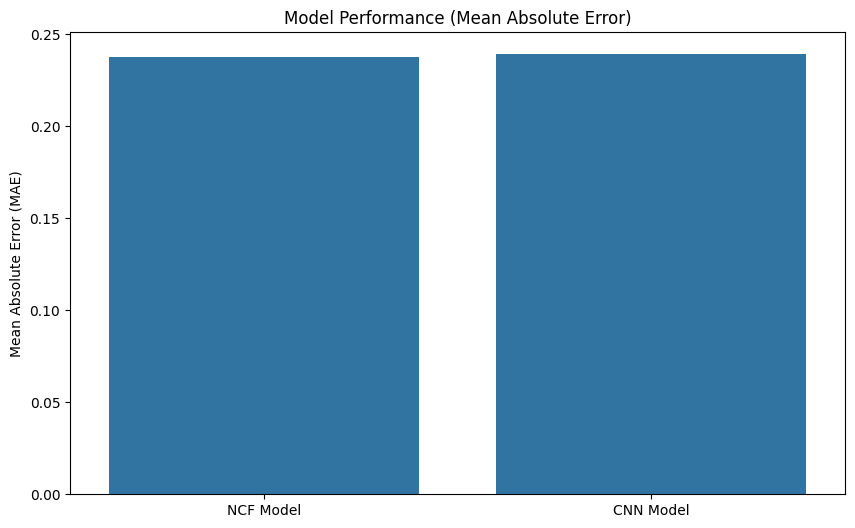

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# These MAE values from model evaluations
ncf_mae = 0.23785340785980225
cnn_mae = 0.23906251788139343

# Bar plot for model performance
models = ['NCF Model', 'CNN Model']
mae_values = [ncf_mae, cnn_mae]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae_values)
plt.title('Model Performance (Mean Absolute Error)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.savefig('../Images/model_performance.png')
plt.show()
